In [1]:
import re
import inspect
import warnings
from IPython.display import display
from copy import deepcopy

import pandas as pd
from path import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

warnings.simplefilter('ignore')

In [2]:
CURRENT_DIR = Path(inspect.getsourcefile(lambda: 0)).abspath().parent
results_paths = [path for path in CURRENT_DIR.files() if path.ext == '.csv']
results_paths.sort()
results_paths

[Path('/home/lore/CLionProjects/mean_shift/results/res-100-dynamic.csv'),
 Path('/home/lore/CLionProjects/mean_shift/results/res-100-static.csv'),
 Path('/home/lore/CLionProjects/mean_shift/results/res-1000-dynamic.csv'),
 Path('/home/lore/CLionProjects/mean_shift/results/res-1000-static.csv'),
 Path('/home/lore/CLionProjects/mean_shift/results/res-10000-dynamic.csv'),
 Path('/home/lore/CLionProjects/mean_shift/results/res-10000-static.csv'),
 Path('/home/lore/CLionProjects/mean_shift/results/res-3000-2.csv'),
 Path('/home/lore/CLionProjects/mean_shift/results/res-3000-3.csv'),
 Path('/home/lore/CLionProjects/mean_shift/results/res-3000-4.csv'),
 Path('/home/lore/CLionProjects/mean_shift/results/res-3000-5.csv'),
 Path('/home/lore/CLionProjects/mean_shift/results/res-3000-6.csv'),
 Path('/home/lore/CLionProjects/mean_shift/results/res-3000-dynamic.csv'),
 Path('/home/lore/CLionProjects/mean_shift/results/res-3000-static.csv')]

In [3]:
col_names = ['id', 'Sequential', 'Parallel', 'Speedup']
data_100 = pd.read_csv("/home/lore/CLionProjects/mean_shift/results/res-100-static.csv", header=None, names=col_names)
data_1000 = pd.read_csv("/home/lore/CLionProjects/mean_shift/results/res-1000-static.csv", header=None, names=col_names)
data_3000 = pd.read_csv("/home/lore/CLionProjects/mean_shift/results/res-3000-static.csv", header=None, names=col_names)
data_10000 = pd.read_csv("/home/lore/CLionProjects/mean_shift/results/res-10000-static.csv", header=None, names=col_names)

In [4]:
data_100_dynamic = pd.read_csv("/home/lore/CLionProjects/mean_shift/results/res-100-dynamic.csv", header=None, names=col_names)
data_1000_dynamic = pd.read_csv("/home/lore/CLionProjects/mean_shift/results/res-1000-dynamic.csv", header=None, names=col_names)
data_3000_dynamic = pd.read_csv("/home/lore/CLionProjects/mean_shift/results/res-3000-dynamic.csv", header=None, names=col_names)
data_10000_dynamic = pd.read_csv("/home/lore/CLionProjects/mean_shift/results/res-10000-dynamic.csv", header=None, names=col_names)

In [5]:
data = pd.concat([data_100, data_1000, data_3000, data_10000])
grouped_mean = data.groupby('id').mean().round(2)
grouped_std = data.groupby('id').std().round(2)
display(grouped_mean)
display(grouped_std)

Sequential  Parallel  Speedup
id                                  
100          7.04      5.14     1.55
1000      1489.34    368.39     4.04
3000      9093.52   2357.39     3.86
10000   129219.70  36960.43     3.50

Sequential  Parallel  Speedup
id                                  
100          0.11      1.73     0.64
1000         1.60      5.60     0.06
3000        29.28     32.63     0.04
10000       64.21    718.77     0.07

In [6]:
data_dynamic = pd.concat([data_100_dynamic, data_1000_dynamic, data_3000_dynamic, data_10000_dynamic])
grouped_mean_dynamic = data_dynamic.groupby('id').mean().round(2)
grouped_std_dynamic = data_dynamic.groupby('id').std().round(2)
display(grouped_mean_dynamic)
display(grouped_std_dynamic)

Sequential  Parallel  Speedup
id                                  
100          7.14      3.56     2.39
1000      1522.40    212.33     7.17
3000      9743.32   1515.54     6.44
10000   130285.30  19971.52     6.52

Sequential  Parallel  Speedup
id                                  
100          0.11      1.48     1.02
1000         2.54      4.56     0.15
3000       232.27     66.31     0.21
10000      267.16    204.98     0.07

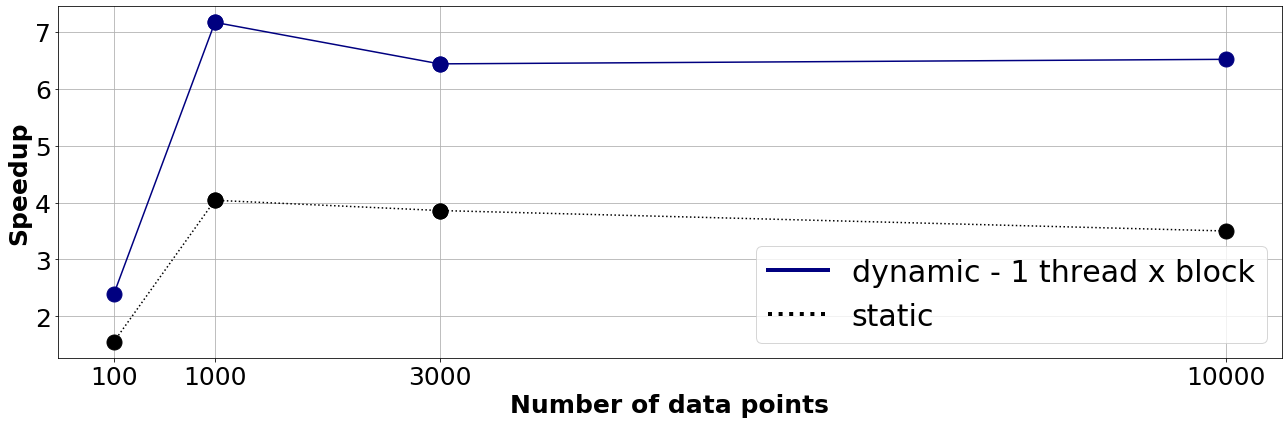

In [10]:
class Result:
    def __init__(self, values = None, color = 'red', name = '', line_type = 'o-'):
        if values is not None:
            self.values = values
        self.color = color
        self.name = name
        self.line_type = line_type

x = [100, 1000, 3000, 10000]
n = len(x)

y2 = Result(grouped_mean['Speedup'], 'black', 'static', 'o:')
y1 = Result(grouped_mean_dynamic['Speedup'], 'navy', 'dynamic - 1 thread x block', 'o-')
all_y = [y1, y2]

fig, ax = plt.subplots(figsize=(18, 6))
for i in range(n - 1):
    for y in all_y:
        plt.plot( x[i: i+2], y.values[i: i+2], y.line_type, color=y.color, markersize=15 )

plt.xticks(x, ('100', '1000', '3000', '10000'))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)

ax.yaxis.label.set_text('Speedup')
ax.yaxis.label.set_fontsize(25)
ax.yaxis.label.set_fontweight('bold')

ax.xaxis.label.set_text('Number of data points')
ax.xaxis.label.set_fontsize(25)
ax.xaxis.label.set_fontweight('bold')

ax.grid(True)
custom_lines = [ plt.Line2D([0], [0], ls=y.line_type[1:], color=y.color, lw=4) for y in all_y ]
ax.legend(custom_lines, [y.name for y in all_y])
plt.rc('legend',fontsize=30)
plt.tight_layout()

plt.savefig('../presentation/figures/speedups.png', format='png')
plt.show()

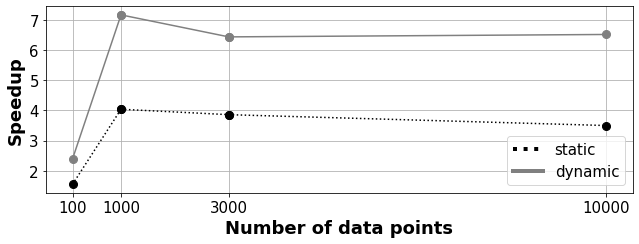

In [20]:
class Result:
    def __init__(self, values = None, color = 'red', name = '', line_type = 'o-'):
        if values is not None:
            self.values = values
        self.color = color
        self.name = name
        self.line_type = line_type

x = [100, 1000, 3000, 10000]
n = len(x)

y1 = Result(grouped_mean['Speedup'], 'black', 'static', 'o:')
y2 = Result(grouped_mean_dynamic['Speedup'], 'grey', 'dynamic', 'o-')
all_y = [y1, y2]

fig, ax = plt.subplots(figsize=(9, 3.5))
for i in range(n - 1):
    for y in all_y:
        plt.plot( x[i: i+2], y.values[i: i+2], y.line_type, color=y.color, markersize=8 )

plt.xticks(x, ('100', '1000', '3000', '10000'))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

ax.yaxis.label.set_text('Speedup')
ax.yaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontweight('bold')

ax.xaxis.label.set_text('Number of data points')
ax.xaxis.label.set_fontsize(18)
ax.xaxis.label.set_fontweight('bold')

ax.grid(True)
custom_lines = [ plt.Line2D([0], [0], ls=y.line_type[1:], color=y.color, lw=4) for y in all_y ]
ax.legend(custom_lines, [y.name for y in all_y])
plt.rc('legend',fontsize=15)
plt.tight_layout()

plt.savefig('../report/figures/small_speedups.png', format='png')
plt.show()

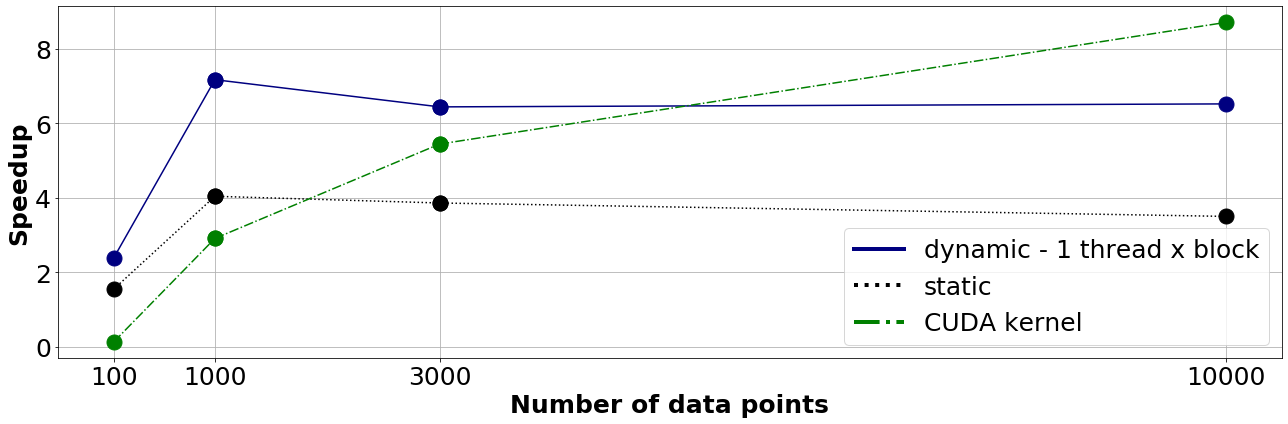

In [14]:
class Result:
    def __init__(self, values = None, color = 'red', name = '', line_type = 'o-'):
        if values is not None:
            self.values = values
        self.color = color
        self.name = name
        self.line_type = line_type

x = [100, 1000, 3000, 10000]
n = len(x)

y2 = Result(grouped_mean['Speedup'], 'black', 'static', 'o:')
y1 = Result(grouped_mean_dynamic['Speedup'], 'navy', 'dynamic - 1 thread x block', 'o-')
y3 = Result([0.133062,
             2.90876,
             5.44191,
             8.70846], 'green', 'CUDA kernel', 'o-.')
all_y = [y1, y2, y3]

fig, ax = plt.subplots(figsize=(18, 6))
for i in range(n - 1):
    for y in all_y:
        plt.plot( x[i: i+2], y.values[i: i+2], y.line_type, color=y.color, markersize=15 )

plt.xticks(x, ('100', '1000', '3000', '10000'))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)

ax.yaxis.label.set_text('Speedup')
ax.yaxis.label.set_fontsize(25)
ax.yaxis.label.set_fontweight('bold')

ax.xaxis.label.set_text('Number of data points')
ax.xaxis.label.set_fontsize(25)
ax.xaxis.label.set_fontweight('bold')

ax.grid(True)
custom_lines = [ plt.Line2D([0], [0], ls=y.line_type[1:], color=y.color, lw=4) for y in all_y ]
ax.legend(custom_lines, [y.name for y in all_y])
plt.rc('legend',fontsize=25)
plt.tight_layout()

plt.savefig('../presentation/figures/speedups_with_CUDA_kernel.png', format='png')
plt.show()